In [22]:
from google.colab import files
data_to_load = files.upload()

Saving savings_data_final.csv to savings_data_final.csv


In [33]:
import plotly.express as px
import pandas as pd
import statistics

df = pd.read_csv("savings_data_final.csv")
fig = px.scatter(df,y="quant_saved",color="female")
fig.show()

In [5]:
import csv

with open('savings_data_final.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

total_entries = len(savings_data)
total_females = 0
for data in savings_data:
  if int(data[3]) == 1:
    total_females += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Female", "Male"], y=[total_females, (total_entries - total_females)]))
fig.show()

In [6]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


In [7]:
#Mean, median and mode of savings
female_savings = []
male_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    female_savings.append(float(data[0]))
  else:
    male_savings.append(float(data[0]))

print("Results for people who are females")
print(f"Mean of savings - {statistics.mean(female_savings)}")
print(f"Median of savings - {statistics.median(female_savings)}")
print(f"Mode of savings - {statistics.mode(female_savings)}")
#To add new lines
print("\n\n")
print("Results for people who are males")
print(f"Mean of savings - {statistics.mean(male_savings)}")
print(f"Median of savings - {statistics.median(male_savings)}")
print(f"Mode of savings - {statistics.mode(male_savings)}")

Results for people who are females
Mean of savings - 78.61157672384391
Median of savings - 39.2724
Mode of savings - 2.284



Results for people who are males
Mean of savings - 87.22929365730847
Median of savings - 39.2724
Mode of savings - 0.0


In [8]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who are females -> {statistics.stdev(female_savings)}")
print(f"Standard deviation of people who are males -> {statistics.stdev(male_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who are females -> 164.58072141099734
Standard deviation of people who are males -> 204.91519933877308


In [34]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")


IndexError: ignored

In [11]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

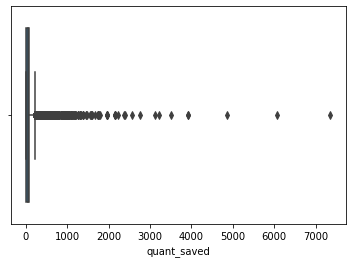

In [13]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [15]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [16]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.20051938981879
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.86687191728863


In [17]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [18]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.12411332262396


In [19]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.20051938981879
Mean of Sampling Distribution - 46.30423648927725


In [35]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.age != 0]

age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

AttributeError: ignored

In [24]:
female_df = new_df.loc[new_df["female"] == 1]
male_df = new_df.loc[new_df["female"] == 0]

print(female_df.head())
print(male_df.head())

   quant_saved  female  highschool_completed  wealthy
0      13.0908       1                     0        0
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
1     39.272400       0                     1        1
8      2.284000       0                     1        1
10    58.908600       0                     1        1
17     2.284000       0                     1        1
28    47.178078       0                     0        0


In [27]:
fig = ff.create_distplot([female_df["quant_saved"].tolist()], ["Savings (Female)"], show_hist=False)
fig.show()

In [28]:
male_savings = male_df["quant_saved"].tolist()

sampling_mean_list_male = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(male_savings))
  sampling_mean_list_male.append(statistics.mean(temp_list))

mean_sampling_male = statistics.mean(sampling_mean_list_male)
stdev_sampling_male = statistics.stdev(sampling_mean_list_male)

print(f"Mean of Sampling (Male) -> {mean_sampling_male}")
print(f"Standard Deviation of Sampling (Male) -> {stdev_sampling_male}")
fig = ff.create_distplot([sampling_mean_list_male], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Male) -> 47.09475226557249
Standard Deviation of Sampling (Male) -> 5.35284770975763


In [29]:
first_std_deviation_start = mean_sampling_male-stdev_sampling_male
first_std_deviation_end = mean_sampling_male+stdev_sampling_male
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_male-(2*stdev_sampling_male)
second_std_deviation_end = mean_sampling_male+(2*stdev_sampling_male)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_male-(3*stdev_sampling_male)
third_std_deviation_end = mean_sampling_male+(3*stdev_sampling_male)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 41.741904555814855 and First (end) - 52.44759997533012
Second (start) - 36.38905684605723 and Second (end) - 57.80044768508775
Third (start) - 31.036209136299597 and Third (end) - 63.15329539484538


In [30]:
female_savings = female_df["quant_saved"].tolist()

sampling_mean_list_female = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(female_savings))
  sampling_mean_list_female.append(statistics.mean(temp_list))

mean_sampling_female = statistics.mean(sampling_mean_list_female)
stdev_sampling_female = statistics.stdev(sampling_mean_list_female)

print(f"Mean of Sampling (Female) -> {mean_sampling_female}")
print(f"Standard Deviation of Sampling (Female) -> {stdev_sampling_female}")
fig = ff.create_distplot([sampling_mean_list_female], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Female) -> 45.69889783202275
Standard Deviation of Sampling (Female) -> 4.914160566558922


In [32]:
z_score = (mean_sampling_female - mean_sampling_male) / stdev_sampling_male
print(f"Z-Score is -> {z_score}")

Z-Score is -> -0.26076856829034256
